# PHYS 210 Mini-Project 02
### RLC Oscillations
Due Mon, Nov 14, 2022 - 9am

#### Project objective

Use `solve_ivp()` to solve the differential equation governing a series RLC circuit, looking at the behaviours of underdamped, critically damped, and overdamped circuits.

#### Before getting started

1. Read the Mini-Project 02 background handout in the same folder as this notebook
1. Read the updated grading rubric document, also in this folder (and on Canvas). It was updated so that the total sums to 100 points, not including the bonus categories.

#### Part 1. Initial Set-up

So that your solutions are as general as possible, we are going to generate random values for your inductance and capacitance in the circuit, with some constraints. Your solutions from one execution of your code to the next might be multiple orders of magnitude different, so decisions about which ranges of values to include should be automated to some extent so that the graphs are able to always show the desired features clearly.

Choose random values of $L$ and $C$, with the following constraints:

1. Start by generating a two-digit integer, $a_L$ between 10 and 99 (inclusive), and
1. A random integer, $b_L$, between -5 and -9 (inclusive) for the exponent.

The inductance is then given by $L = {a_L} \times 10^{b_L}$ Henries.

Repeat this process using the same constraints, but with _**new**_ random numbers to get the capacitance, $C = {a_C} \times 10^{b_C}$ Farad.

Finally, we determine three values of $R$, to represent the underdamped, critically damped and overdamped cases, respectively, based on the already determined values of $L$ and $C$:

$$R_1 = \frac{1}{10} \times 2\pi\sqrt{\frac{L}{C}}$$
$$R_2 = 2\pi\sqrt{\frac{L}{C}}$$
$$R_3 = 5 \times 2\pi\sqrt{\frac{L}{C}}$$

In [3]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

# random values for the calculation of inductance
a_L = np.random.randint(10,100)
b_L = np.random.randint(-9,-4)

L = a_L * 10 ** b_L  # the inductance

# random values for the calculation of capacitence
a_C = np.random.randint(10,100)
b_C = np.random.randint(-9,-4)

C = a_C * 10 ** b_C  # the capacitence

# the 3 values of resistance for the 3 different cases
R_1 = 1 / 10 * 2 * np.sqrt(L / C)  # under-dampened
R_2 = 2 * np.sqrt(L / C)  # critically dampened
R_3 = 5 * 2 * np.sqrt(L / C)  # over-dampened

#### Part 2: Time evolution of the current in the three circuits

We will use a primary observable of the current in the circuit $I(t)=dq(t)/dt$ to describe what is happening in each circuit. The current in the circuit is driven by an AC voltage source, with amplitude $V_0$ and frequency $\omega$, much like how you can increase the amplitude of a person on a swing by providing an external periodic push. We will have our voltage source provide its voltage at a frequency of $\omega = \omega_0 = 1/\sqrt{LC}$ to match the resonant frequency of the circuit, much like how you want to match the timing of your pushes to the oscillation frequency of the person on the swing.

These types of systems can take a while to settle into their steady-state oscillatory behaviour, so we want to see how long it takes each circuit to get to get to a steady-state amplitude for the current, starting from an initial state of no charge on the capacitor, $q(0)=0$ and no current in the circuit, $I(0)=0$.

**The task:** 

* Generate a 3-panel figure that shows the time evolution of $I(t)$ for the three cases above, driven by a sinusoidal voltage of $(V_0 = 0.1\textrm{V})$ at a frequency of $\omega = \omega_0$. Start with the initial conditions of no charge stored in the capacitor and no current in the circuit, $q(0) = I(0) = 0$.
* Ensure that your code chooses the time interval and time steps wisely so that it captures the behaviour of the oscillator, such that you can see the evolution (known as the transient) from  $I(0) = 0$ to the stable amplitude of the oscillating current. One challenge is to write the program so that it will work well over the large range of possible $L$ and $C$ values generated from the random numbers, will work well across the three types of damping, and will still generate plots showing the requested features. You should test your code with the Validate button several times, which should generate new random values of $L$ and $C$ to ensure that your plots look good each time.

**The small details:**

* The figure should consist of _three_ vertically stacked subplots, each showing the behaviour for one of the damping cases, clearly labelled as underdamped, critically damped and overdamped.
* The values of the randomly generated R, L and C should be indicated in the titles of each panel.
* You should use a common time interval across all three subplots.

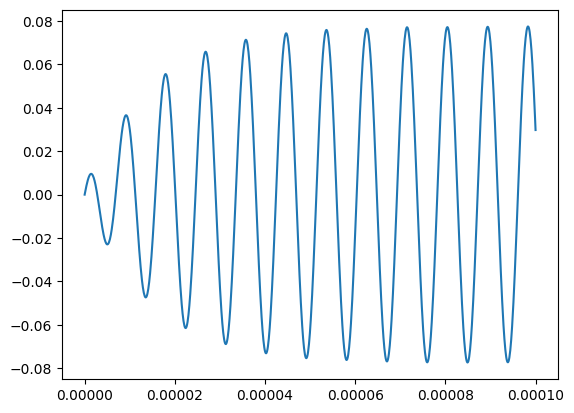

In [19]:
from cmath import sqrt
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

V_0 = 0.1  # inital voltage, also the amplitude
I_0 = 0  # initial current
q_0 = 0  # initial charge on capacitor
freq = 1 / sqrt(L * C)  # frequency of voltage oscillation
R_arr = [R_1, R_2, R_3]  # makes a list of resistance values


def dydt_arr(t, y_arr, V_0, R):
    """Relates the used physical quantities to their differential
    equations for use in the scipy numerical integration function"""

    I = y_arr[0]  # 1st physical quantity in y_arr
    q = y_arr[1]  # 2nd physical quantity in y_arr
    V = V_0 * np.cos(freq * t)

    # This is [dI/dt, dq/dt, dV/dt]
    return np.array([1 / L * V - 1 / (L * C) * q - R / L * I, I])

t_0 = 0  # start time
t_max = 0.0001  # end time
steps = 1000  # number of steps
t_arr = np.linspace(t_0, t_max, steps)  # array of avaluated times

y_0arr = np.array([I_0, q_0])  # defines the inititial values of our physical quantities

sol_arr = []  # creating solution list outside of loop

for i in R_arr: 

    sol = integrate.solve_ivp(dydt_arr, (t_0, t_max), y_0arr, method = 'LSODA', t_eval = t_arr, args = (V_0, i))

    sol_arr.append(sol['y'][0])
    sol_arr.append(sol['y'][1])

R1sol_I = sol_arr[0]
R1sol_q = sol_arr[1]
R2sol_I = sol_arr[2]
R2sol_q = sol_arr[3]
R3sol_I = sol_arr[4]
R3sol_q = sol_arr[5]

plt.plot(t_arr, R1sol_I)



#### Part 3: Resonance plots

Lastly, we want to explore how the steady-state amplitude in each of the three circuits depends on the frequency $(\omega)$ of the sinusoidal driving voltage. Resonance, which occurs when the provided driving frequency closely matches the natural/resonant frequency of the system, is famously the cause of the Tacoma Narrows bridge collapse.

To explore the dependence of the steady-state amplitude of the current on the frequency $(\omega)$ of the sinusoidal driving voltage, generate another figure with three vertically-stacked subplots. Each panel/subplot should show a plot of the steady-state amplitude of the current vs the frequency of the driving voltage for a range from 

$$0.1 \frac{\omega_0}{2 \pi} \; \textrm{ to }\; 2 \frac{\omega_0}{2 \pi}.$$.

The three panels should show the resonance curves (amplitude of the steady-state current vs $\omega$), clearly labelled for the three damping cases. For each point you plot, the current should represent the amplitude of the response current (for a drive amplitude of $V_0 = 0.1\textrm{V}$) at a time _after_ the transient behaviour has died away, such that and the current has stabilized to a steady sinusoidal oscillation. Your calculations should be made at frequencies spaced closely enough that when plotted with a continuous line, the curves are smooth. The values of R, L and C should be indicated in the titles of each panel. The plots should use Hz units ($\omega/2\pi$).

This will require calling `solve_ivp()` numerous times and will require more cpu time to execute than anything we have seen so far, though should in total not take more than a minute or so.

**The small details:**

* The figure should consist of _three_ vertically stacked subplots, each showing the behaviour for one of the damping cases, clearly labelled as underdamped, critically damped and overdamped.
* The values of R, L and C should be indicated in the titles of each panel.

In [20]:
# Generate resonance plots here
# YOUR CODE HERE



# Acknowledgements

In the cell below, please describe the role of **anyone other than yourself** who contributed to the work shown in this notebook.

Its ok to get help from us and classmates! Please get in the habit of acknowledging such contributions.

If you want to refer to a classmate, please use only their cocalc email-id and not their name - or you could just say something like: "a classmate gave me the idea to use xxx feature to solve yyy problem."


_Acknowledgements here:_



# Extension Code and Description
All solution code for the main project question should appear in the cell "cell-project1-main" above. Project extensions go in the cell "cell-extension" immediately below and the descriptions of your extension go in the cell below that.

In [21]:
# B1. OPTIONAL project extension here
# These can call functions in your code above if desired
# YOUR CODE HERE



_In this cell, please describe any new language features or project extension you have implemented:_




# Grading cells
The cells below marked as "grade use only" are created as placeholders so that we can provide a manual grade and comments for each category. 

Exceptions are the "2. Style" test, which has an associated autograder test that you can run to check style and the timing cell "cell-optimization0", which you can use to test your code execution time.

In [22]:
# 1. Code execution (grader use only)

In [23]:
# 2. Style: pep8 (see note below regarding use of the Format button to fix many errors)
#
# Tests for pep8 returns warnings or errors. You may need to hit 'Save' after making changes for them to take effect.
nb_name = "project02.ipynb"
cells_to_check = []
stop_at = ['cell-extension']
# check_style2.py uses cells_to_check and nb_name
%run -i check_style2.py

ModuleNotFoundError: No module named 'pycodestyle'

Also note that you can use the Format button while in a code cell to automagically fix most pep8 errors (other than way too long print statements)

![](project02-format.png)

In [ ]:
# 3. Results (grader use only)

In [ ]:
# 4. Readability (grader use only)

In [ ]:
# 5. Plot (grader use only)

In [ ]:
# Check execution time
nb_name = "project02.ipynb"
cells_to_time = []
stop_at = ['cell-extension']
%run -i time_cells2.py

In [ ]:
# 5. Code optimization/timing (grader use only)

In [ ]:
# B2. New Functionality/Language features (grader use only)